## Dataset Details

Johns Hopkins University has made an excellent dashboard using the affected cases data of the new Corona virus known as Covid-19. Data is extracted from the google sheets associated and made available here.

Now data is available as csv files in the Johns Hopkins Github repository. Please refer to the github repository for the Terms of Use details.I accessed the dataset via kaggle under the link give below : https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

The data i used was last updated on : 4 June 2020


This dataset was provided by Sudalai Rajkumar (Data Scientist | Kaggle Grandmaster)
https://www.kaggle.com/sudalairajkumar

## Content 

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

## Column Description

Main file in this dataset is covid_19_data.csv and the detailed descriptions are below.

covid_19_data.csv

Sno - Serial number

ObservationDate - Date of the observation in MM/DD/YYYY

Province/State - Province or state of the observation 

Country/Region - Country of observation

Last Update - Time in UTC at which the row is updated for the given province or country

Confirmed - Cumulative number of confirmed cases till that date

Deaths - Cumulative number of of deaths till that date

Recovered - Cumulative number of recovered cases till that date


In [26]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
Dataset_Path = os.path.join(os.getcwd(),'Dataset','covid_19_data.csv')

In [28]:
Dataset = pd.read_csv(Dataset_Path)

In [29]:
Dataset.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


## Quality Assessment

In [30]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36569 entries, 0 to 36568
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              36569 non-null  int64  
 1   ObservationDate  36569 non-null  object 
 2   Province/State   19578 non-null  object 
 3   Country/Region   36569 non-null  object 
 4   Last Update      36569 non-null  object 
 5   Confirmed        36569 non-null  float64
 6   Deaths           36569 non-null  float64
 7   Recovered        36569 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.2+ MB


In [31]:
Dataset.describe()

,SNo,Confirmed,Deaths,Recovered
count,36569.000000,36569.000000,36569.000000,36569.000000
mean,18285.000000,7061.157210,451.389538,2478.894774
std,10556.705334,26084.903867,2373.565468,15155.335928
min,1.000000,0.000000,0.000000,0.000000
25%,9143.000000,33.000000,0.000000,0.000000
50%,18285.000000,371.000000,6.000000,18.000000
75%,27427.000000,2423.000000,68.000000,430.000000
max,36569.000000,405843.000000,40465.000000,500849.000000


In [32]:
observation_date = pd.to_datetime(Dataset.ObservationDate)
print('There are {} data from {} to {}'.format(observation_date.shape[0],min(observation_date),max(observation_date)))

There are 36569 data from 2020-01-22 00:00:00 to 2020-06-06 00:00:00


In [33]:
#unique province
null_values = Dataset['Province/State'].isnull().sum()
unique_id = Dataset['Province/State'].unique()

print('Total {} valuesoutof which {} is null in Province/State'.format(observation_date.shape[0],null_values))
print('There are {} unique elements'.format(unique_id.shape[0]))
unique_id[:10]

Total 36569 valuesoutof which 16991 is null in Province/State
There are 663 unique elements


array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei'], dtype=object)

## Analysing Indian Data

In [34]:
covid_india=Dataset[Dataset['Country/Region']=="India"]
covid_india["ObservationDate"]=pd.to_datetime(covid_india["ObservationDate"])


/Users/sanjaymsanthosh/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
india_datewise=covid_india.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
#week of year 
india_datewise["WeekofYear"]=india_datewise.index.weekofyear
#days since
india_datewise["Days Since"]=(india_datewise.index-india_datewise.index[0])
india_datewise["Days Since"]=india_datewise["Days Since"].dt.days

In [36]:
print("Confirmed Cases : {}".format(india_datewise["Confirmed"].iloc[-1]))
print("Recovered Cases : {}".format(india_datewise["Recovered"].iloc[-1]))
print("Death Cases : {}".format(india_datewise["Deaths"].iloc[-1]))
print("Active Cases : {}".format(india_datewise["Confirmed"].iloc[-1]-india_datewise["Recovered"].iloc[-1]-india_datewise["Deaths"].iloc[-1]))
print("Closed Cases : {}\n".format(india_datewise["Recovered"].iloc[-1]+india_datewise["Deaths"].iloc[-1]))
print("Confirmed Cases per day : {}".format(round(india_datewise["Confirmed"].iloc[-1]/india_datewise.shape[0])))
print("Recovered Cases per day : {}".format(round(india_datewise["Recovered"].iloc[-1]/india_datewise.shape[0])))
print("Death Cases per day : {}\n".format(round(india_datewise["Deaths"].iloc[-1]/india_datewise.shape[0])))
print("New Cofirmed Cases in last 24 hours are : {}".format(india_datewise["Confirmed"].iloc[-1]-india_datewise["Confirmed"].iloc[-2]))
print("New Recoverd Cases in last 24 hours are : {}".format(india_datewise["Recovered"].iloc[-1]-india_datewise["Recovered"].iloc[-2]))
print("New Death Cases in last 24 hours are : {}".format(india_datewise["Deaths"].iloc[-1]-india_datewise["Deaths"].iloc[-2]))

Confirmed Cases : 246622.0
Recovered Cases : 118695.0
Death Cases : 6946.0
Active Cases : 120981.0
Closed Cases : 125641.0

Confirmed Cases per day : 1912.0
Recovered Cases per day : 920.0
Death Cases per day : 54.0

New Cofirmed Cases in last 24 hours are : 10438.0
New Recoverd Cases in last 24 hours are : 5462.0
New Death Cases in last 24 hours are : 297.0


In [37]:
fig=px.bar(x=india_datewise.index,y=india_datewise["Confirmed"]-india_datewise["Recovered"]-india_datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

In [38]:
fig=px.bar(x=india_datewise.index,y=india_datewise["Recovered"]+india_datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

In [39]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

### Mortality rate and recovery rate

In [40]:
print('Mean Recovery Rate: ',((india_datewise["Recovered"]/india_datewise["Confirmed"])*100).mean())
print('Mean Mortality Rate: ',((india_datewise["Deaths"]/india_datewise["Confirmed"])*100).mean())
print('Median Recovery Rate: ',((india_datewise["Recovered"]/india_datewise["Confirmed"])*100).median())
print('Median Mortality Rate: ',((india_datewise["Deaths"]/india_datewise["Confirmed"])*100).median())

fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=india_datewise.index, y=(india_datewise["Recovered"]/india_datewise["Confirmed"])*100,
              name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=india_datewise.index, y=(india_datewise["Deaths"]/india_datewise["Confirmed"])*100,
              name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Mean Recovery Rate:  28.743854762249256
Mean Mortality Rate:  1.9510146450517447
Median Recovery Rate:  17.65467393063272
Median Mortality Rate:  2.8048305414881183


### Daily Increase and decrease of cases

In [41]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"].diff().fillna(0),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"].diff().fillna(0),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"].diff().fillna(0),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [42]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"].diff().rolling(window=7).mean(),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"].diff().rolling(window=7).mean(),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"].diff().rolling(window=7).mean().diff(),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="7 Days Rolling mean of Confirmed, Recovered and Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

### Feature Engineering : Doubling Rate

In [43]:
cases=65
double_days=[]
C=[]
while(1):
    double_days.append(int(india_datewise[india_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<india_datewise["Confirmed"].max()):
        continue
    else:
        break
        
cases=65
tipling_days=[]
C1=[]
while(1):
    tipling_days.append(int(india_datewise[india_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C1.append(cases)
    cases=cases*3
    if(cases<india_datewise["Confirmed"].max()):
        continue
    else:
        break
        
india_doubling=pd.DataFrame(list(zip(C,double_days)),columns=["No. of cases","Days since first case"])
india_doubling["Number of days required to Double the cases"]=india_doubling["Days since first case"].diff().fillna(india_doubling["Days since first case"].iloc[0])

india_tripling=pd.DataFrame(list(zip(C1,tipling_days)),columns=["No. of cases","Days since first case"])
india_tripling["Number of days required to Triple the cases"]=india_tripling["Days since first case"].diff().fillna(india_tripling["Days since first case"].iloc[0])

india_doubling.style.background_gradient(cmap='Reds')

,No. of cases,Days since first case,Number of days required to Double the cases
0,65,41,41.000000
1,130,46,5.000000
2,260,50,4.000000
3,520,53,3.000000
4,1040,59,6.000000
5,2080,62,3.000000
6,4160,66,4.000000
7,8320,71,5.000000
8,16640,79,8.000000
9,33280,90,11.000000


## Data Exploration

In [44]:
#Extracting other countries for comparison of worst affected countries
covid_spain=Dataset[Dataset['Country/Region']=="Spain"]
covid_us=Dataset[Dataset['Country/Region']=="US"]
covid_italy=Dataset[Dataset['Country/Region']=="Italy"]
covid_iran=Dataset[Dataset['Country/Region']=="Iran"]
covid_france=Dataset[Dataset['Country/Region']=="France"]
covid_uk=Dataset[Dataset['Country/Region']=="UK"]
covid_br=Dataset[Dataset['Country/Region']=="Brazil"]

#Extracting data of neighbouring countries
covid_pak=Dataset[Dataset['Country/Region']=="Pakistan"]
covid_china=Dataset[Dataset['Country/Region']=="Mainland China"]
covid_afg=Dataset[Dataset['Country/Region']=="Afghanistan"]
covid_nepal=Dataset[Dataset['Country/Region']=="Nepal"]
covid_bhutan=Dataset[Dataset['Country/Region']=="Bhutan"]
covid_lanka=Dataset[Dataset["Country/Region"]=="Sri Lanka"]
covid_ban=Dataset[Dataset["Country/Region"]=="Bangladesh"]


In [45]:
#Grouping the data based on the Date 
india_datewise2=covid_india.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
spain_datewise=covid_spain.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
us_datewise=covid_us.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
italy_datewise=covid_italy.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
iran_datewise=covid_iran.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
france_datewise=covid_france.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
uk_datewise=covid_uk.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
brazil_datewise=covid_br.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

pak_datewise=covid_pak.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
china_datewise=covid_china.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
afg_datewise=covid_afg.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
nepal_datewise=covid_nepal.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
bhutan_datewise=covid_bhutan.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
lanka_datewise=covid_lanka.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
ban_datewise=covid_ban.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

### Country wise analysis

In [46]:
n_countries=["Pakistan","Mainland China","Afghanistan","Nepal","Bhutan","Sri Lanka","Bangladesh","India"]
comp_data=pd.concat([pak_datewise.iloc[[-1]],china_datewise.iloc[[-1]],afg_datewise.iloc[[-1]],nepal_datewise.iloc[[-1]],
          bhutan_datewise.iloc[[-1]],lanka_datewise.iloc[[-1]],ban_datewise.iloc[[-1]],india_datewise2.iloc[[-1]]])
comp_data.index=n_countries
comp_data["Mortality"]=(comp_data["Deaths"]/comp_data["Confirmed"])*100
comp_data["Recovery"]=(comp_data["Recovered"]/comp_data["Confirmed"])*100
comp_data["Survival Probability"]=(1-(comp_data["Deaths"]/comp_data["Confirmed"]))*100
comp_data.sort_values(["Confirmed"],ascending=False)
comp_data.style.background_gradient(cmap='Reds')

,Confirmed,Recovered,Deaths,Mortality,Recovery,Survival Probability
Pakistan,93983.000000,32581.000000,1935.000000,2.058883,34.666908,97.941117
Mainland China,83036.000000,78331.000000,4634.000000,5.580712,94.333783,94.419288
Afghanistan,19551.000000,1830.000000,327.000000,1.672549,9.360135,98.327451
Nepal,3235.000000,365.000000,13.000000,0.401855,11.282844,99.598145
Bhutan,48.000000,11.000000,0.000000,0.000000,22.916667,100.000000
Sri Lanka,1814.000000,891.000000,11.000000,0.606395,49.117971,99.393605
Bangladesh,63026.000000,13325.000000,846.000000,1.342303,21.142068,98.657697
India,246622.000000,118695.000000,6946.000000,2.816456,48.128310,97.183544


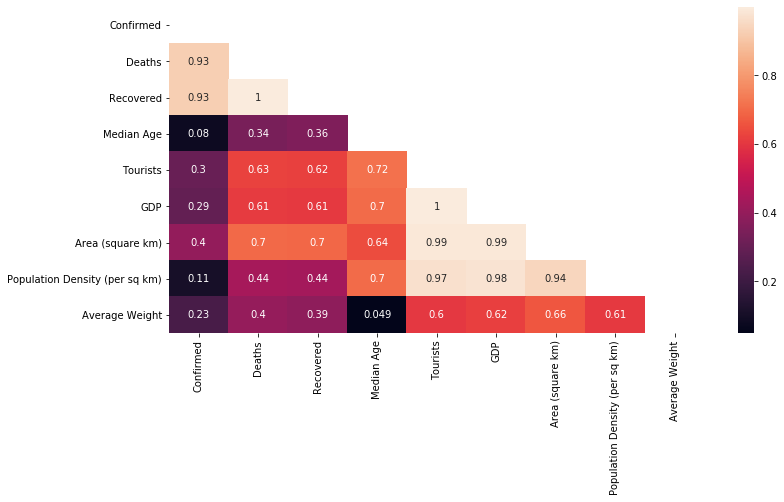

In [47]:
n_median_age=[23.5,38.7,18.6,25,28.6,34.1,27.5, 28.2]
n_tourist=[907000,59270000,0,753000,210000,2051000,303000,14570000]
n_gdp=[0.38,15.12,0.02,0.03,0.00,0.11,0.31,3.28]
area=[907132,9596961,652230,147181,38394,65610,147570,3287263]
population_density=[286.5,21717,59.63,204.430,21.188,341.5,1265.036,450.419]
avg_weight=[58.976,60.555,56.935,50.476,51.142,50.421,49.591,52.943]
comp_data["Median Age"]=n_median_age
comp_data["Tourists"]=n_tourist
comp_data["GDP"]=n_gdp
comp_data["Area (square km)"]=area
comp_data["Population Density (per sq km)"]=population_density
comp_data["Average Weight"]=avg_weight

req=comp_data[["Confirmed","Deaths","Recovered","Median Age","Tourists","GDP",
               "Area (square km)","Population Density (per sq km)","Average Weight"]]
plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(req.corr(), dtype=np.bool))
sns.heatmap(req.corr(),annot=True, mask=mask)

## storing data for later use

In [48]:
india_datewise.to_csv(os.path.join(os.getcwd() , 'Output','india_datewise.csv'))

In [49]:
india_datewise.head()

,Confirmed,Recovered,Deaths,WeekofYear,Days Since
ObservationDate,,,,,
2020-01-30,1.0,0.0,0.0,5,0
2020-01-31,1.0,0.0,0.0,5,1
2020-02-01,1.0,0.0,0.0,5,2
2020-02-02,2.0,0.0,0.0,5,3
2020-02-03,3.0,0.0,0.0,6,4
